In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from fbprophet import Prophet
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
df = pd.read_pickle('./pkl_files/df_10.pkl')

In [94]:
df.shape[0], df.shape[1]

(125677, 11)

In [95]:
df.head()

,PV Cell,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:40:00+00:00,A,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333
2014-01-01 07:40:00+00:00,B,9.722917,7.595080,7.247334,0.912466,0.618750,281.888467,0.041626,0.939702,9.750000,26.312500
2014-01-01 07:50:00+00:00,B,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.246500,4.836387,9.940000,21.045000
2014-01-01 07:50:00+00:00,A,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000
2014-01-01 08:00:00+00:00,B,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.938500,18.431113,10.890000,19.635000


In [96]:
df['dt'] = df.index

In [97]:
df['dt'].min(), df['dt'].max()

(Timestamp('2014-01-01 07:40:00+0000', tz='UTC'),
 Timestamp('2016-12-29 17:20:00+0000', tz='UTC'))

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125677 entries, 2014-01-01 07:40:00+00:00 to 2016-12-29 17:20:00+00:00
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   PV Cell                   125677 non-null  object             
 1   Ambient Temperature [ºC]  125677 non-null  float64            
 2   Global Radiation [W/m2]   125677 non-null  float64            
 3   Diffuse Radiation [W/m2]  125677 non-null  float64            
 4   Ultraviolet [W/m2]        125677 non-null  float64            
 5   Wind Velocity [m/s]       125677 non-null  float64            
 6   Wind Direction [º]        125677 non-null  float64            
 7   Current DC [A]            125677 non-null  float64            
 8   Power DC [W]              125677 non-null  float64            
 9   Surface Temperature [ºC]  125677 non-null  float64            
 10  Voltage DC [V]        

In [99]:
cut = '2015-05-31'
mask_train = (df['dt'] >='2014-01-01') & (df['dt'] <= cut)
mask_test = (df['dt'] >= cut) & (df['dt'] <='2015-12-31')

In [100]:
df_train = df.loc[mask_train]
df_test = df.loc[mask_test]

In [101]:
df_train.shape[0], df_test.shape[0]

(74249, 23643)

In [102]:
s = df_train.shape[0]+df_test.shape[0]

In [103]:
df_train.shape[0]/s

0.7584787316634659

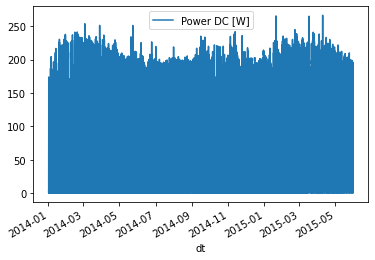

In [104]:
df_train.plot(x='dt',y='Power DC [W]')

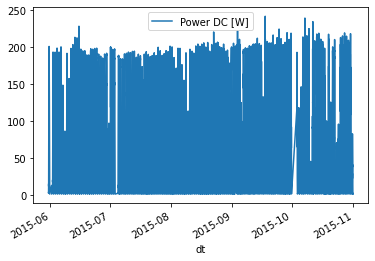

In [105]:
df_test.plot(x='dt',y='Power DC [W]')

In [106]:
X_train = df_train.drop(columns=['Power DC [W]'])
X_test = df_test.drop(columns=['Power DC [W]'])

In [108]:
y_train = df_train['Power DC [W]']
y_test = df_test['Power DC [W]']

In [109]:
X_train.shape, X_test.shape

((74249, 11), (23643, 11))

In [110]:
y_train.shape, y_test.shape

((74249,), (23643,))

In [129]:
df['ds'] = df['dt']

,PV Cell,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V],ds
Datetime,,,,,,,,,,,,
2014-01-01 07:40:00+00:00,A,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333,2014-01-01 07:40:00+00:00
2014-01-01 07:40:00+00:00,B,9.722917,7.595080,7.247334,0.912466,0.618750,281.888467,0.041626,0.939702,9.750000,26.312500,2014-01-01 07:40:00+00:00
2014-01-01 07:50:00+00:00,B,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.246500,4.836387,9.940000,21.045000,2014-01-01 07:50:00+00:00
2014-01-01 07:50:00+00:00,A,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000,2014-01-01 07:50:00+00:00
2014-01-01 08:00:00+00:00,B,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.938500,18.431113,10.890000,19.635000,2014-01-01 08:00:00+00:00


In [130]:
df['y'] = df['Power DC [W]']

In [159]:
df['ds']=df.index.tz_localize(None)

In [160]:
df.dtypes

PV Cell                             object
Ambient Temperature [ºC]           float64
Global Radiation [W/m2]            float64
Diffuse Radiation [W/m2]           float64
Ultraviolet [W/m2]                 float64
Wind Velocity [m/s]                float64
Wind Direction [º]                 float64
Current DC [A]                     float64
Power DC [W]                       float64
Surface Temperature [ºC]           float64
Voltage DC [V]                     float64
ds                          datetime64[ns]
y                                  float64
dtype: object

In [ ]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='d')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)